## Python API H/W
### 3 Trends noticed
#### Higher Temperatures near equartor
#### Most Cities have above 50% humidity
#### Most window speed is less than 30

In [1]:
#Imports
import pandas as pd
from citipy import citipy
from config import api_key
import numpy as np
import random
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
#structure for output
#[lat,lng,cityNumber,cityName,url]
numberOfCities = 500  # number of uniques cities required
lat = []
lon = []
cityNumber = []
cityNames = []
windSpeeds = []
temperatures = []
humidity = []
cloudiness = []
urls = []
cityObjs = []



In [3]:
#find unique cities

myCount = 0
missed = 0
holdingBin = []   #use as a  temp pseudo set obj
while myCount < numberOfCities:   #this may take a litle time 
    tempLat = float(format(random.uniform(-90,90), '.4f'))
    tempLon = float(format(random.uniform(-180,180), '.4f'))
    tempCityObj = citipy.nearest_city(tempLat,tempLon)
    if tempCityObj.city_name in holdingBin:
        missed = missed + 1
    else:
        myCount = myCount + 1
        holdingBin.append(tempCityObj.city_name)
        lat.append(tempLat)
        lon.append(tempLon)
        cityNumber.append(myCount)
        cityObjs.append(tempCityObj)
        cityNames.append(tempCityObj.city_name)
        

print("Duplicate attempts: {}  Checkin: {}".format(missed, len(holdingBin)))
#cityNames


Duplicate attempts: 668  Checkin: 500


In [4]:
#get the weather of the unique cities 
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
passCode = "appid=" + api_key
cordDict={}

url = base_url + passCode
cordDict['units'] = 'imperial'     #convert temperature in F
fieldNames = ["Latitude", "Longitude","City Name","Country","Temperature","Wind Speed","Humidity","Cloudiness","URL"]

with open('python-api.csv', 'w') as csvFile:
    writer = csv.writer(csvFile, delimiter=',')
    writer.writerow(fieldNames)
    for x in range(numberOfCities):
        cordDict["lat"] = lat[x]
        cordDict["lon"] = lon[x]
        r = requests.get(url,params = cordDict)
        print(r.url)
        print("Status: " + str(r.status_code))
        answer = r.json()
        humidity.append(answer['main']['humidity'])
        windSpeeds.append(answer['wind']['speed'])
        
        temperatures.append(answer['main']['temp'])  
        
        cloudiness.append(answer['weather'][0]['description'])
        urls.append(r.url)
        print("Recieved: {} City Name: {}  Url:".format(x + 1,cityNames[x]),urls[x])
        csvRow = [lat[x],lon[x],cityObjs[x].city_name,cityObjs[x].country_code,\
                temperatures[x],windSpeeds[x],humidity[x],cloudiness[x],urls[x]]
        writer.writerow(csvRow)
        
        

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-0.871&lon=-44.0942
Status: 200
Recieved: 1 City Name: cururupu  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-0.871&lon=-44.0942
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=2.6977&lon=130.2371
Status: 200
Recieved: 2 City Name: ternate  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=2.6977&lon=130.2371
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-69.4251&lon=83.5599
Status: 200
Recieved: 3 City Name: busselton  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-69.4251&lon=83.5599
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperi

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=48.377&lon=-145.0233
Status: 200
Recieved: 28 City Name: kodiak  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=48.377&lon=-145.0233
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-41.416&lon=39.5071
Status: 200
Recieved: 29 City Name: margate  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-41.416&lon=39.5071
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-28.9333&lon=14.0023
Status: 200
Recieved: 30 City Name: oranjemund  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-28.9333&lon=14.0023
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=35.4402&lon=169.6669
Status: 200
Recieved: 56 City Name: nikolskoye  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=35.4402&lon=169.6669
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=86.815&lon=-134.7748
Status: 200
Recieved: 57 City Name: tuktoyaktuk  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=86.815&lon=-134.7748
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=69.7668&lon=164.0399
Status: 200
Recieved: 58 City Name: bilibino  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=69.7668&lon=164.0399
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=42.4084&lon=142.8889
Status: 200
Recieved: 83 City Name: shizunai  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=42.4084&lon=142.8889
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=9.303&lon=-21.4269
Status: 200
Recieved: 84 City Name: oussouye  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=9.303&lon=-21.4269
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=51.806&lon=48.1257
Status: 200
Recieved: 85 City Name: balakovo  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=51.806&lon=48.1257
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperia

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-61.5815&lon=156.7898
Status: 200
Recieved: 111 City Name: tuatapere  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-61.5815&lon=156.7898
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=83.1315&lon=-34.9304
Status: 200
Recieved: 112 City Name: tasiilaq  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=83.1315&lon=-34.9304
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-24.6663&lon=24.7193
Status: 200
Recieved: 113 City Name: letlhakeng  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-24.6663&lon=24.7193
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=81.5211&lon=-66.5956
Status: 200
Recieved: 139 City Name: narsaq  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=81.5211&lon=-66.5956
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-3.7546&lon=-67.416
Status: 200
Recieved: 140 City Name: santo antonio do ica  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-3.7546&lon=-67.416
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-1.7923&lon=-76.7711
Status: 200
Recieved: 141 City Name: palora  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-1.7923&lon=-76.7711
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087c

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=6.2556&lon=-42.3325
Status: 200
Recieved: 167 City Name: carutapera  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=6.2556&lon=-42.3325
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-27.3758&lon=63.4547
Status: 200
Recieved: 168 City Name: mahebourg  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-27.3758&lon=63.4547
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-40.0361&lon=154.611
Status: 200
Recieved: 169 City Name: batemans bay  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-40.0361&lon=154.611
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=24.5043&lon=90.4822
Status: 200
Recieved: 194 City Name: gafargaon  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=24.5043&lon=90.4822
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.2429&lon=12.907
Status: 200
Recieved: 195 City Name: benguela  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.2429&lon=12.907
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=22.9881&lon=-75.2875
Status: 200
Recieved: 196 City Name: clarence town  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=22.9881&lon=-75.2875
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=5.4317&lon=57.8051
Status: 200
Recieved: 221 City Name: bandarbeyla  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=5.4317&lon=57.8051
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=72.153&lon=141.7296
Status: 200
Recieved: 222 City Name: deputatskiy  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=72.153&lon=141.7296
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=72.1402&lon=-137.8511
Status: 200
Recieved: 223 City Name: aklavik  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=72.1402&lon=-137.8511
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&u

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=33.4264&lon=-110.3467
Status: 200
Recieved: 249 City Name: safford  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=33.4264&lon=-110.3467
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=54.646&lon=25.9818
Status: 200
Recieved: 250 City Name: pabrade  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=54.646&lon=25.9818
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=45.3142&lon=43.2258
Status: 200
Recieved: 251 City Name: aleksandriya  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=45.3142&lon=43.2258
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&unit

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.556&lon=14.8522
Status: 200
Recieved: 276 City Name: caconda  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.556&lon=14.8522
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-28.1291&lon=-77.2023
Status: 200
Recieved: 277 City Name: coquimbo  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-28.1291&lon=-77.2023
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-4.7456&lon=174.9405
Status: 200
Recieved: 278 City Name: lolua  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-4.7456&lon=174.9405
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-18.8223&lon=161.7923
Status: 200
Recieved: 304 City Name: poum  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-18.8223&lon=161.7923
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=61.1892&lon=141.8845
Status: 200
Recieved: 305 City Name: okhotsk  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=61.1892&lon=141.8845
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-31.7661&lon=134.8729
Status: 200
Recieved: 306 City Name: flinders  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-31.7661&lon=134.8729
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&uni

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-37.1563&lon=161.0709
Status: 200
Recieved: 331 City Name: nelson bay  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-37.1563&lon=161.0709
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=27.4131&lon=-75.5773
Status: 200
Recieved: 332 City Name: marsh harbour  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=27.4131&lon=-75.5773
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=57.3317&lon=-144.4853
Status: 200
Recieved: 333 City Name: palmer  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=57.3317&lon=-144.4853
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a6290

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=33.3271&lon=134.9223
Status: 200
Recieved: 359 City Name: gobo  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=33.3271&lon=134.9223
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=62.1417&lon=52.4641
Status: 200
Recieved: 360 City Name: sindor  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=62.1417&lon=52.4641
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-4.5435&lon=42.7276
Status: 200
Recieved: 361 City Name: lamu  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-4.5435&lon=42.7276
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&l

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-17.916&lon=26.5174
Status: 200
Recieved: 387 City Name: hwange  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-17.916&lon=26.5174
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=9.5233&lon=62.7667
Status: 200
Recieved: 388 City Name: kavaratti  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=9.5233&lon=62.7667
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=21.9309&lon=65.0048
Status: 200
Recieved: 389 City Name: keti bandar  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=21.9309&lon=65.0048
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=im

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.92&lon=165.8492
Status: 200
Recieved: 415 City Name: sola  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-13.92&lon=165.8492
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-23.0323&lon=52.5356
Status: 200
Recieved: 416 City Name: saint-leu  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-23.0323&lon=52.5356
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=74.857&lon=22.3833
Status: 200
Recieved: 417 City Name: hammerfest  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=74.857&lon=22.3833
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-26.9584&lon=176.0758
Status: 200
Recieved: 442 City Name: kaeo  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-26.9584&lon=176.0758
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=40.2972&lon=65.2132
Status: 200
Recieved: 443 City Name: karmana  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=40.2972&lon=65.2132
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=50.8203&lon=-42.1265
Status: 200
Recieved: 444 City Name: nanortalik  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=50.8203&lon=-42.1265
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=29.0599&lon=-131.157
Status: 200
Recieved: 470 City Name: pacific grove  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=29.0599&lon=-131.157
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=48.5695&lon=44.0755
Status: 200
Recieved: 471 City Name: bereslavka  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=48.5695&lon=44.0755
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=58.6906&lon=45.7675
Status: 200
Recieved: 472 City Name: pyshchug  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=58.6906&lon=45.7675
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f

http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-0.988&lon=25.0995
Status: 200
Recieved: 497 City Name: kisangani  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=-0.988&lon=25.0995
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=22.7617&lon=88.306
Status: 200
Recieved: 498 City Name: baidyabati  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=22.7617&lon=88.306
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=24.8805&lon=-114.3432
Status: 200
Recieved: 499 City Name: constitucion  Url: http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&units=imperial&lat=24.8805&lon=-114.3432
http://api.openweathermap.org/data/2.5/weather?appid=ce062735e8cfa1f84a544a629087cf4f&u

In [5]:
#Generate main dataframe
sourceDict={}
sourceDict['City Names'] = cityNames
sourceDict['Temperatures'] = temperatures
sourceDict['Humidity'] = humidity
sourceDict['Cloudiness'] = cloudiness
sourceDict['Wind Speed'] = windSpeeds
sourceDict['Latitude'] = lat

#vaildation
if len(cityNames) != numberOfCities:
   print("City name range problem")
if( len (temperatures) != numberOfCities):
   print("Temperatures range problem")
if( len (cloudiness) != numberOfCities):
   print("cloudiness range problem")
if( len (lat) != numberOfCities):
    print("lats range problem")
if( len (windSpeeds) != numberOfCities):
    print("windspeed range problem")
    
    
source_df = pd.DataFrame.from_dict(sourceDict)
source_df.head(10)

,City Names,Cloudiness,Humidity,Latitude,Temperatures,Wind Speed
0,cururupu,overcast clouds,100,-0.8710,80.77,9.86
1,ternate,clear sky,100,2.6977,83.47,15.01
2,busselton,few clouds,66,-69.4251,-10.04,17.47
3,arraial do cabo,broken clouds,99,-25.9430,79.96,21.27
4,yushu,light rain,61,45.0048,53.23,14.45
5,atuona,overcast clouds,100,-4.0373,80.59,11.77
6,rikitea,broken clouds,100,-66.9936,28.30,15.35
7,puerto ayora,overcast clouds,100,-12.1886,76.45,14.79
8,ushuaia,broken clouds,84,-68.4353,14.08,0.36
9,norfolk,clear sky,100,41.9344,22.57,10.29


### Scatter plots

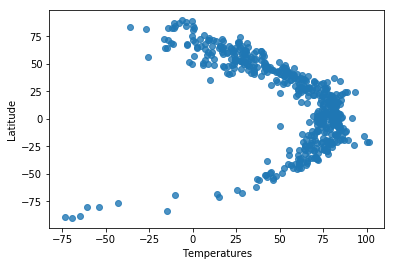

In [6]:
#time to plot scatter plots
%matplotlib inline

#Temperature (F) vs. Latitude
myPlot = sns.regplot(data = source_df, x = "Temperatures", y = "Latitude", fit_reg=False)
myFig = myPlot.get_figure()
myFig.savefig("temp_vs_lat.png")
plt.show()

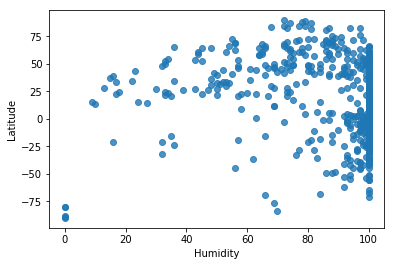

In [7]:
# Humidity (%) vs. Latitude
myPlot = sns.regplot(data = source_df, x = "Humidity", y = "Latitude", fit_reg=False)
myFig = myPlot.get_figure()
myFig.savefig("humidity_vs_lat.png")
plt.show()

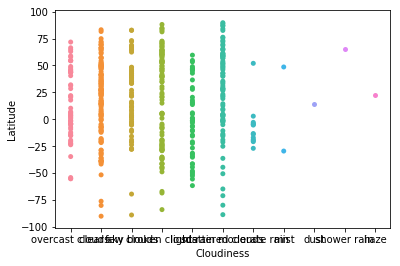

In [8]:
# Cloudiness (%) vs. Latitude
#Catgorical
myPlot = sns.stripplot(data = source_df, x = "Cloudiness", y = "Latitude")
myFig = myPlot.get_figure()
myFig.savefig("cloudiness_vs_lat.png")
plt.show()

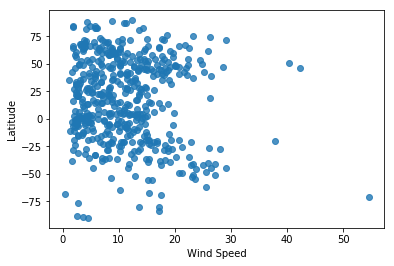

In [9]:
# wind speed vs. Latitude
myPlot = sns.regplot(data = source_df, x = "Wind Speed", y = "Latitude", fit_reg=False)
myFig = myPlot.get_figure()
myFig.savefig("windSpeed_vs_lat.png")
plt.show()